In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git clone https://github.com/BasilKhan07/FYP-2023.git

Cloning into 'FYP-2023'...
remote: Enumerating objects: 10203, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10203 (delta 0), reused 11 (delta 0), pack-reused 10191
Receiving objects: 100% (10203/10203), 1.59 GiB | 29.98 MiB/s, done.
Updating files: 100% (10155/10155), done.


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import load_model
import seaborn as sns

In [ ]:
path_train = r'/content/FYP-2023/Dataset/Train'
path_test = r'/content/FYP-2023/Dataset/Test'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path_train, target_size=(224,224), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(224,224), class_mode='categorical')

Found 8145 images belonging to 19 classes.
Found 2010 images belonging to 19 classes.


In [ ]:
def AlexNet(input_shape):

    X_input = Input(input_shape)

    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)

    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)

    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)

    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)

    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)

    X = Flatten()(X)

    X = Dense(4096, activation = 'relu', name = "fc0")(X)

    X = Dense(4096, activation = 'relu', name = 'fc1')(X)

    X = Dense(19,activation='softmax',name = 'fc2')(X)

    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    print(X)
    return model
    print(X)

In [ ]:
print(train[0][0].shape[1:])

(224, 224, 3)


In [ ]:
model_alexnet_final = AlexNet(train[0][0].shape[1:])

KerasTensor(type_spec=TensorSpec(shape=(None, 19), dtype=tf.float32, name=None), name='fc2/Softmax:0', description="created by layer 'fc2'")


In [ ]:
model_alexnet_final.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 54, 54, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 54, 54, 96)        384       
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 26, 26, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 26, 26, 256)       1024

In [ ]:
model_alexnet_final.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history_alexnet_final = model_alexnet_final.fit(
  train,
  validation_data=test,
  epochs=30,
  steps_per_epoch=len(train),
  validation_steps=len(test)
)

model_alexnet_final.save('Alexnet_final_model.h5')
print("model saved to Disk.")

Epoch 1/30
255/255 [==============================] - 99s 351ms/step - loss: 2.6344 - accuracy: 0.5021 - val_loss: 1.8561 - val_accuracy: 0.4502
Epoch 2/30
255/255 [==============================] - 91s 356ms/step - loss: 0.8260 - accuracy: 0.7191 - val_loss: 1.3614 - val_accuracy: 0.5433
Epoch 3/30
255/255 [==============================] - 84s 328ms/step - loss: 0.6131 - accuracy: 0.7880 - val_loss: 1.5881 - val_accuracy: 0.5473
Epoch 4/30
255/255 [==============================] - 81s 319ms/step - loss: 0.4748 - accuracy: 0.8298 - val_loss: 4.5089 - val_accuracy: 0.2667
Epoch 5/30
255/255 [==============================] - 81s 319ms/step - loss: 0.4298 - accuracy: 0.8502 - val_loss: 1.2811 - val_accuracy: 0.6517
Epoch 6/30
255/255 [==============================] - 84s 330ms/step - loss: 0.3663 - accuracy: 0.8738 - val_loss: 0.7041 - val_accuracy: 0.7806
Epoch 7/30
255/255 [==============================] - 82s 324ms/step - loss: 0.3240 - accuracy: 0.8862 - val_loss: 0.3756 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model saved to Disk.


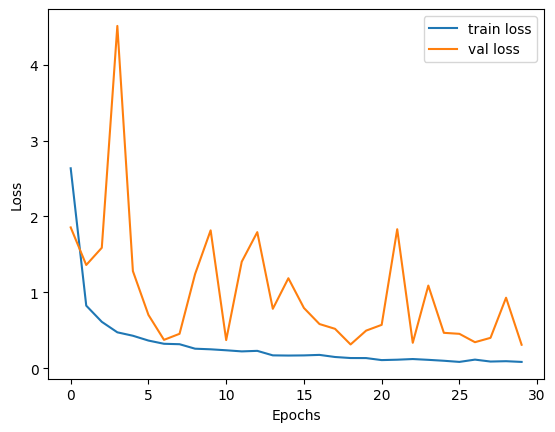

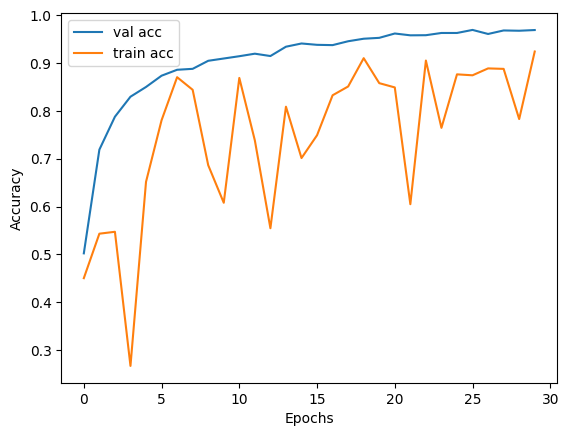

In [ ]:
#plot the loss
plt.plot(history_alexnet_final.history['loss'], label='train loss')
plt.plot(history_alexnet_final.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the accuracy
plt.plot(history_alexnet_final.history['accuracy'], label='val acc')
plt.plot(history_alexnet_final.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# dirname = os.path.join(os.path.dirname(__file__))
model_new_alex_final = load_model('Alexnet_final_model.h5')
print("model loaded.")

model loaded.


In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    path_test,
     target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 2010 images belonging to 19 classes.


In [ ]:
predictions = model_new_alex_final.predict(test_data_generator, steps=test_steps_per_epoch)

63/63 [==============================] - 17s 272ms/step


In [ ]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0 ... 18 18 18]
[ 0  1  0 ... 18 18 18]


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
print(class_labels)


['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged', 'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged', 'Tomato_old', 'Tomato_ripe', 'Tomato_unripe']


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report)
print(cmat)
print(acc)

                        precision    recall  f1-score   support

          Apple_blotch       0.71      0.64      0.67        64
         Apple_healthy       0.84      0.91      0.88       137
          Apple_rotten       0.99      0.92      0.95       136
            Apple_scab       0.97      0.93      0.95        42
           Banana_firm       0.94      0.97      0.95       148
 Banana_heavilybruised       0.90      0.93      0.92       136
Banana_slightlybruised       0.92      0.86      0.89       159
   GreenChilli_damaged       0.84      1.00      0.92        27
     GreenChilli_dried       0.91      0.99      0.95       100
       GreenChilli_old       0.98      0.81      0.88        52
      GreenChilli_ripe       0.80      0.90      0.85        40
    GreenChilli_unripe       0.93      0.82      0.87        45
       Orange_greening       0.90      0.96      0.93       136
        Orange_healthy       0.93      0.77      0.85        71
         Orange_rotten       0.96      

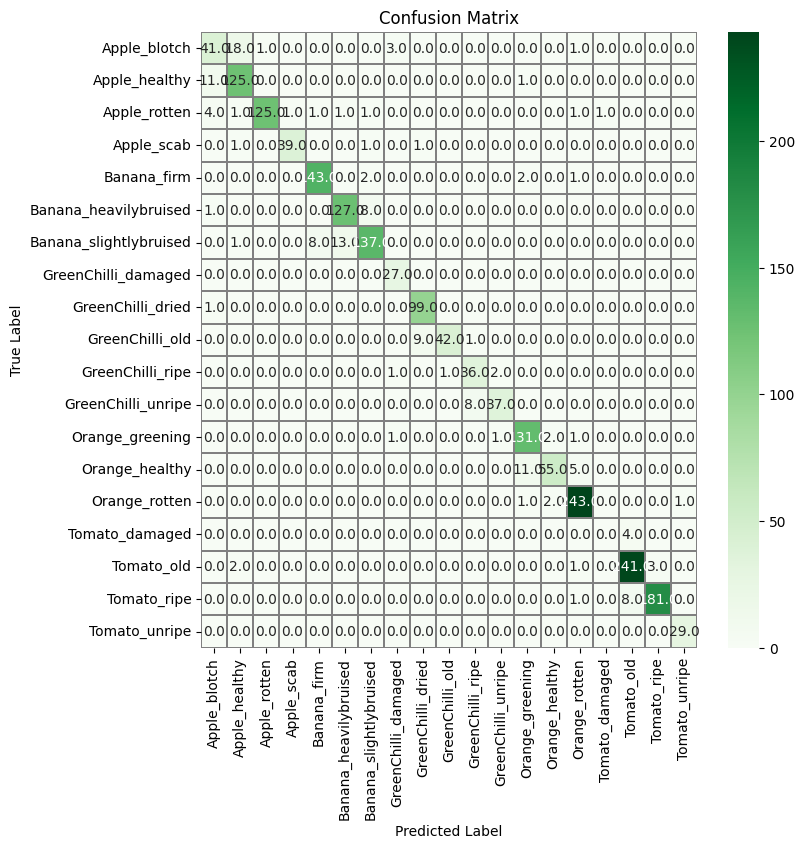

In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged',
                    'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged',
                    'Tomato_old', 'Tomato_ripe', 'Tomato_unripe'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged',
                    'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged',
                    'Tomato_old', 'Tomato_ripe', 'Tomato_unripe'])

plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [ ]:
import pandas as pd
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(confusion_mtx)).transpose()
classes = ['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged',
                    'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged',
                    'Tomato_old', 'Tomato_ripe', 'Tomato_unripe']
df['CLASSES'] = classes
df.set_index('CLASSES', inplace=True)
df

,TPR,FNR,FPR,TNR
CLASSES,,,,
Apple_blotch,0.640625,0.359375,0.008736,0.991264
Apple_healthy,0.912409,0.087591,0.012280,0.987720
Apple_rotten,0.919118,0.080882,0.000534,0.999466
Apple_scab,0.928571,0.071429,0.000508,0.999492
Banana_firm,0.966216,0.033784,0.004834,0.995166
Banana_heavilybruised,0.933824,0.066176,0.007471,0.992529
Banana_slightlybruised,0.861635,0.138365,0.006483,0.993517
GreenChilli_damaged,1.000000,0.000000,0.002521,0.997479
GreenChilli_dried,0.990000,0.010000,0.005236,0.994764


In [ ]:
print("Alexnet analysis: ")
print("TPR average: ",df["TPR"].mean())
print("FPR average: ",df["FPR"].mean())
print("TNR average: ",df["TNR"].mean())
print("FNR average: ",df["FNR"].mean())

Alexnet analysis: 
TPR average:  0.8595969084658991
FPR average:  0.00426170084909278
TNR average:  0.9957382991509071
FNR average:  0.14040309153410097
